# Shot Level Model Training

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil
import torch

In [8]:
level_dir = 'C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/CVProject-ShotAngle_LevelClassifier/level_data'
test_dir = 'C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/CVProject-ShotAngle_LevelClassifier/level_data/test'

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
Setup complete  (16 CPUs, 31.7 GB RAM, 491.3/931.0 GB disk)


In [4]:
from ultralytics import YOLO

In [5]:
level_model = YOLO('yolov8n-cls.pt')
level_model.to('cuda')

100%|█████████████████████████████████████████████████████████████████████████████| 5.31M/5.31M [00:00<00:00, 10.5MB/s]


YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_

In [6]:
level_model.train(data=level_dir, epochs=75,patience=75)

New https://pypi.org/project/ultralytics/8.3.27 available  Update with 'pip install -U ultralytics'
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/CVProject-ShotAngle_LevelClassifier/level_data, epochs=75, time=None, patience=75, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|█████████████████████████████████████████████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 10.5MB/s]


AMP: checks passed 


train: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_da

train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\train\eye\eye_8003.JPG: corrupt JPEG restored and saved
train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\train\hip\hip_8003.JPG: corrupt JPEG restored and saved
train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\train\shoulder\shoulder_8003.JPG: corrupt JPEG restored and saved



val: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data

val: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\val\ground-knee\ground_8003.JPG: corrupt JPEG restored and saved
val: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\val\ground-knee\knee_8003.JPG: corrupt JPEG restored and saved
val: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\val\hip\hip_01207.jpg: corrupt JPEG restored and saved


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs\classify\train4
Starting training for 75 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 68.05it/s]

                   all      0.746          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 76.32it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 89.71it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 93.77it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 79.58it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 76.53it/s]

                   all       0.81          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 86.35it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 74.55it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 75.82it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


      10/75     0.266G      0.324          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 73.37it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


      11/75     0.266G     0.3071          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 71.51it/s]

                   all      0.826          1



      Epoch    GPU_mem       loss  Instances       Size


      12/75     0.266G     0.2764          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 83.48it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


      13/75     0.266G      0.277          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 90.46it/s]

                   all        0.8          1



      Epoch    GPU_mem       loss  Instances       Size


      14/75     0.266G     0.2518          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 59.08it/s]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


      15/75     0.266G     0.2638          3        224: 100%|██████████| 140/140 [00:05<00:00, 27.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 71.20it/s]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


      16/75     0.266G     0.2494          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 85.54it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


      17/75     0.266G     0.2047          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 60.10it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


      18/75     0.266G     0.2255          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 85.47it/s]

                   all      0.816          1



      Epoch    GPU_mem       loss  Instances       Size


      19/75     0.266G     0.1936          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 93.33it/s] 

                   all      0.816          1



      Epoch    GPU_mem       loss  Instances       Size


      20/75     0.266G     0.2017          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 86.54it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


      21/75     0.266G     0.1921          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 77.40it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      22/75     0.266G     0.1861          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 99.37it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


      23/75     0.266G     0.1826          3        224: 100%|██████████| 140/140 [00:05<00:00, 27.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 74.33it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


      24/75     0.266G     0.1863          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 75.63it/s]

                   all      0.812          1



      Epoch    GPU_mem       loss  Instances       Size


      25/75     0.266G     0.1763          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 68.15it/s]

                   all      0.779          1



      Epoch    GPU_mem       loss  Instances       Size


      26/75     0.266G      0.168          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 85.65it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      27/75     0.266G     0.1593          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 95.48it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


      28/75     0.266G     0.1432          3        224: 100%|██████████| 140/140 [00:05<00:00, 27.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 49.58it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


      29/75     0.266G      0.147          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 67.93it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


      30/75     0.266G      0.158          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 65.78it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      31/75     0.266G       0.14          3        224: 100%|██████████| 140/140 [00:05<00:00, 26.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 83.59it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


      32/75     0.266G     0.1328          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 81.61it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


      33/75     0.266G     0.1353          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 88.25it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


      34/75     0.266G     0.1296          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 79.38it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


      35/75     0.266G     0.1204          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 71.50it/s]

                   all      0.781          1



      Epoch    GPU_mem       loss  Instances       Size


      36/75     0.266G     0.1197          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 63.20it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


      37/75     0.266G      0.137          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 90.52it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


      38/75     0.266G     0.1186          3        224: 100%|██████████| 140/140 [00:05<00:00, 26.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 76.90it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      39/75     0.266G     0.1133          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 78.64it/s]

                   all      0.785          1



      Epoch    GPU_mem       loss  Instances       Size


      40/75     0.266G     0.1085          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 82.37it/s]

                   all      0.783          1



      Epoch    GPU_mem       loss  Instances       Size


      41/75     0.266G     0.1127          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 81.89it/s]

                   all      0.787          1



      Epoch    GPU_mem       loss  Instances       Size


      42/75     0.266G     0.1007          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 80.00it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


      43/75     0.266G     0.1082          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 75.20it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      44/75     0.266G     0.1227          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 88.10it/s]


                   all      0.804          1

      Epoch    GPU_mem       loss  Instances       Size


      45/75     0.266G     0.1083          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 83.93it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


      46/75     0.266G     0.1221          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 77.80it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


      47/75     0.266G      0.105          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 92.56it/s]

                   all      0.789          1



      Epoch    GPU_mem       loss  Instances       Size


      48/75     0.266G     0.1064          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 74.48it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      49/75     0.266G    0.08575          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 74.40it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


      50/75     0.266G     0.0991          3        224: 100%|██████████| 140/140 [00:05<00:00, 27.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 91.98it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      51/75     0.266G    0.08947          3        224: 100%|██████████| 140/140 [00:05<00:00, 27.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 80.40it/s]

                   all      0.795          1



      Epoch    GPU_mem       loss  Instances       Size


      52/75     0.266G    0.09313          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 77.10it/s]

                   all        0.8          1



      Epoch    GPU_mem       loss  Instances       Size


      53/75     0.266G    0.08499          3        224: 100%|██████████| 140/140 [00:05<00:00, 27.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 82.29it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      54/75     0.266G    0.07883          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 84.90it/s]

                   all      0.793          1



      Epoch    GPU_mem       loss  Instances       Size


      55/75     0.266G    0.07886          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 78.94it/s]

                   all      0.795          1



      Epoch    GPU_mem       loss  Instances       Size


      56/75     0.266G     0.0849          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 87.29it/s]

                   all      0.795          1



      Epoch    GPU_mem       loss  Instances       Size


      57/75     0.266G    0.09118          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 79.06it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


      58/75     0.266G    0.08186          3        224: 100%|██████████| 140/140 [00:05<00:00, 25.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 73.34it/s]

                   all      0.808          1



      Epoch    GPU_mem       loss  Instances       Size


      59/75     0.266G    0.09521          3        224: 100%|██████████| 140/140 [00:05<00:00, 26.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 57.42it/s]

                   all        0.8          1



      Epoch    GPU_mem       loss  Instances       Size


      60/75     0.266G    0.07481          3        224: 100%|██████████| 140/140 [00:05<00:00, 23.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 69.42it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


      61/75     0.266G    0.09197          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 85.87it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      62/75     0.266G    0.08307          3        224: 100%|██████████| 140/140 [00:05<00:00, 27.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 65.86it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


      63/75     0.266G    0.08008          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 81.08it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


      64/75     0.266G     0.0711          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 70.79it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


      65/75     0.266G    0.06638          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 82.18it/s]

                   all      0.795          1



      Epoch    GPU_mem       loss  Instances       Size


      66/75     0.266G    0.06166          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 71.98it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      67/75     0.266G    0.07967          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 80.45it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


      68/75     0.266G    0.06874          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 81.23it/s]

                   all      0.795          1



      Epoch    GPU_mem       loss  Instances       Size


      69/75     0.266G    0.07212          3        224: 100%|██████████| 140/140 [00:05<00:00, 27.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 83.76it/s]

                   all      0.798          1



      Epoch    GPU_mem       loss  Instances       Size


      70/75     0.266G    0.06122          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 79.89it/s]

                   all      0.806          1



      Epoch    GPU_mem       loss  Instances       Size


      71/75     0.266G    0.05538          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 79.01it/s]

                   all        0.8          1



      Epoch    GPU_mem       loss  Instances       Size


      72/75     0.266G    0.06894          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 94.52it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      73/75     0.266G    0.06297          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 77.27it/s]

                   all      0.802          1



      Epoch    GPU_mem       loss  Instances       Size


      74/75     0.266G    0.05951          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 72.82it/s]

                   all      0.804          1



      Epoch    GPU_mem       loss  Instances       Size


      75/75     0.266G    0.06283          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 78.80it/s]

                   all      0.798          1



75 epochs completed in 0.124 hours.
Optimizer stripped from runs\classify\train4\weights\last.pt, 3.0MB
Optimizer stripped from runs\classify\train4\weights\best.pt, 3.0MB

Validating runs\classify\train4\weights\best.pt...
Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\train... found 2227 images in 5 classes  
val: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\val... found 484 images in 5 classes  
test: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\test... found 467 images in 5 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 16/16 [00:00<00:00, 56.24it/s]


                   all      0.829          1
Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train4


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002525D5532F0>
curves: []
curves_results: []
fitness: 0.9142561852931976
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8285123705863953, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9142561852931976}
save_dir: WindowsPath('runs/classify/train4')
speed: {'preprocess': 0.1234899867664684, 'inference': 0.33508893872095535, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.8285123705863953
top5: 1.0

In [11]:
metrics = level_model.val()

Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
train: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\train... found 2227 images in 5 classes  
val: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\val... found 467 images in 5 classes  
test: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\test... found 484 images in 5 classes  


val: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data

val: New cache created: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\val.cache



               classes   top1_acc   top5_acc: 100%|██████████| 30/30 [00:00<00:00, 34.26it/s]


                   all      0.854          1
Speed: 0.2ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train44


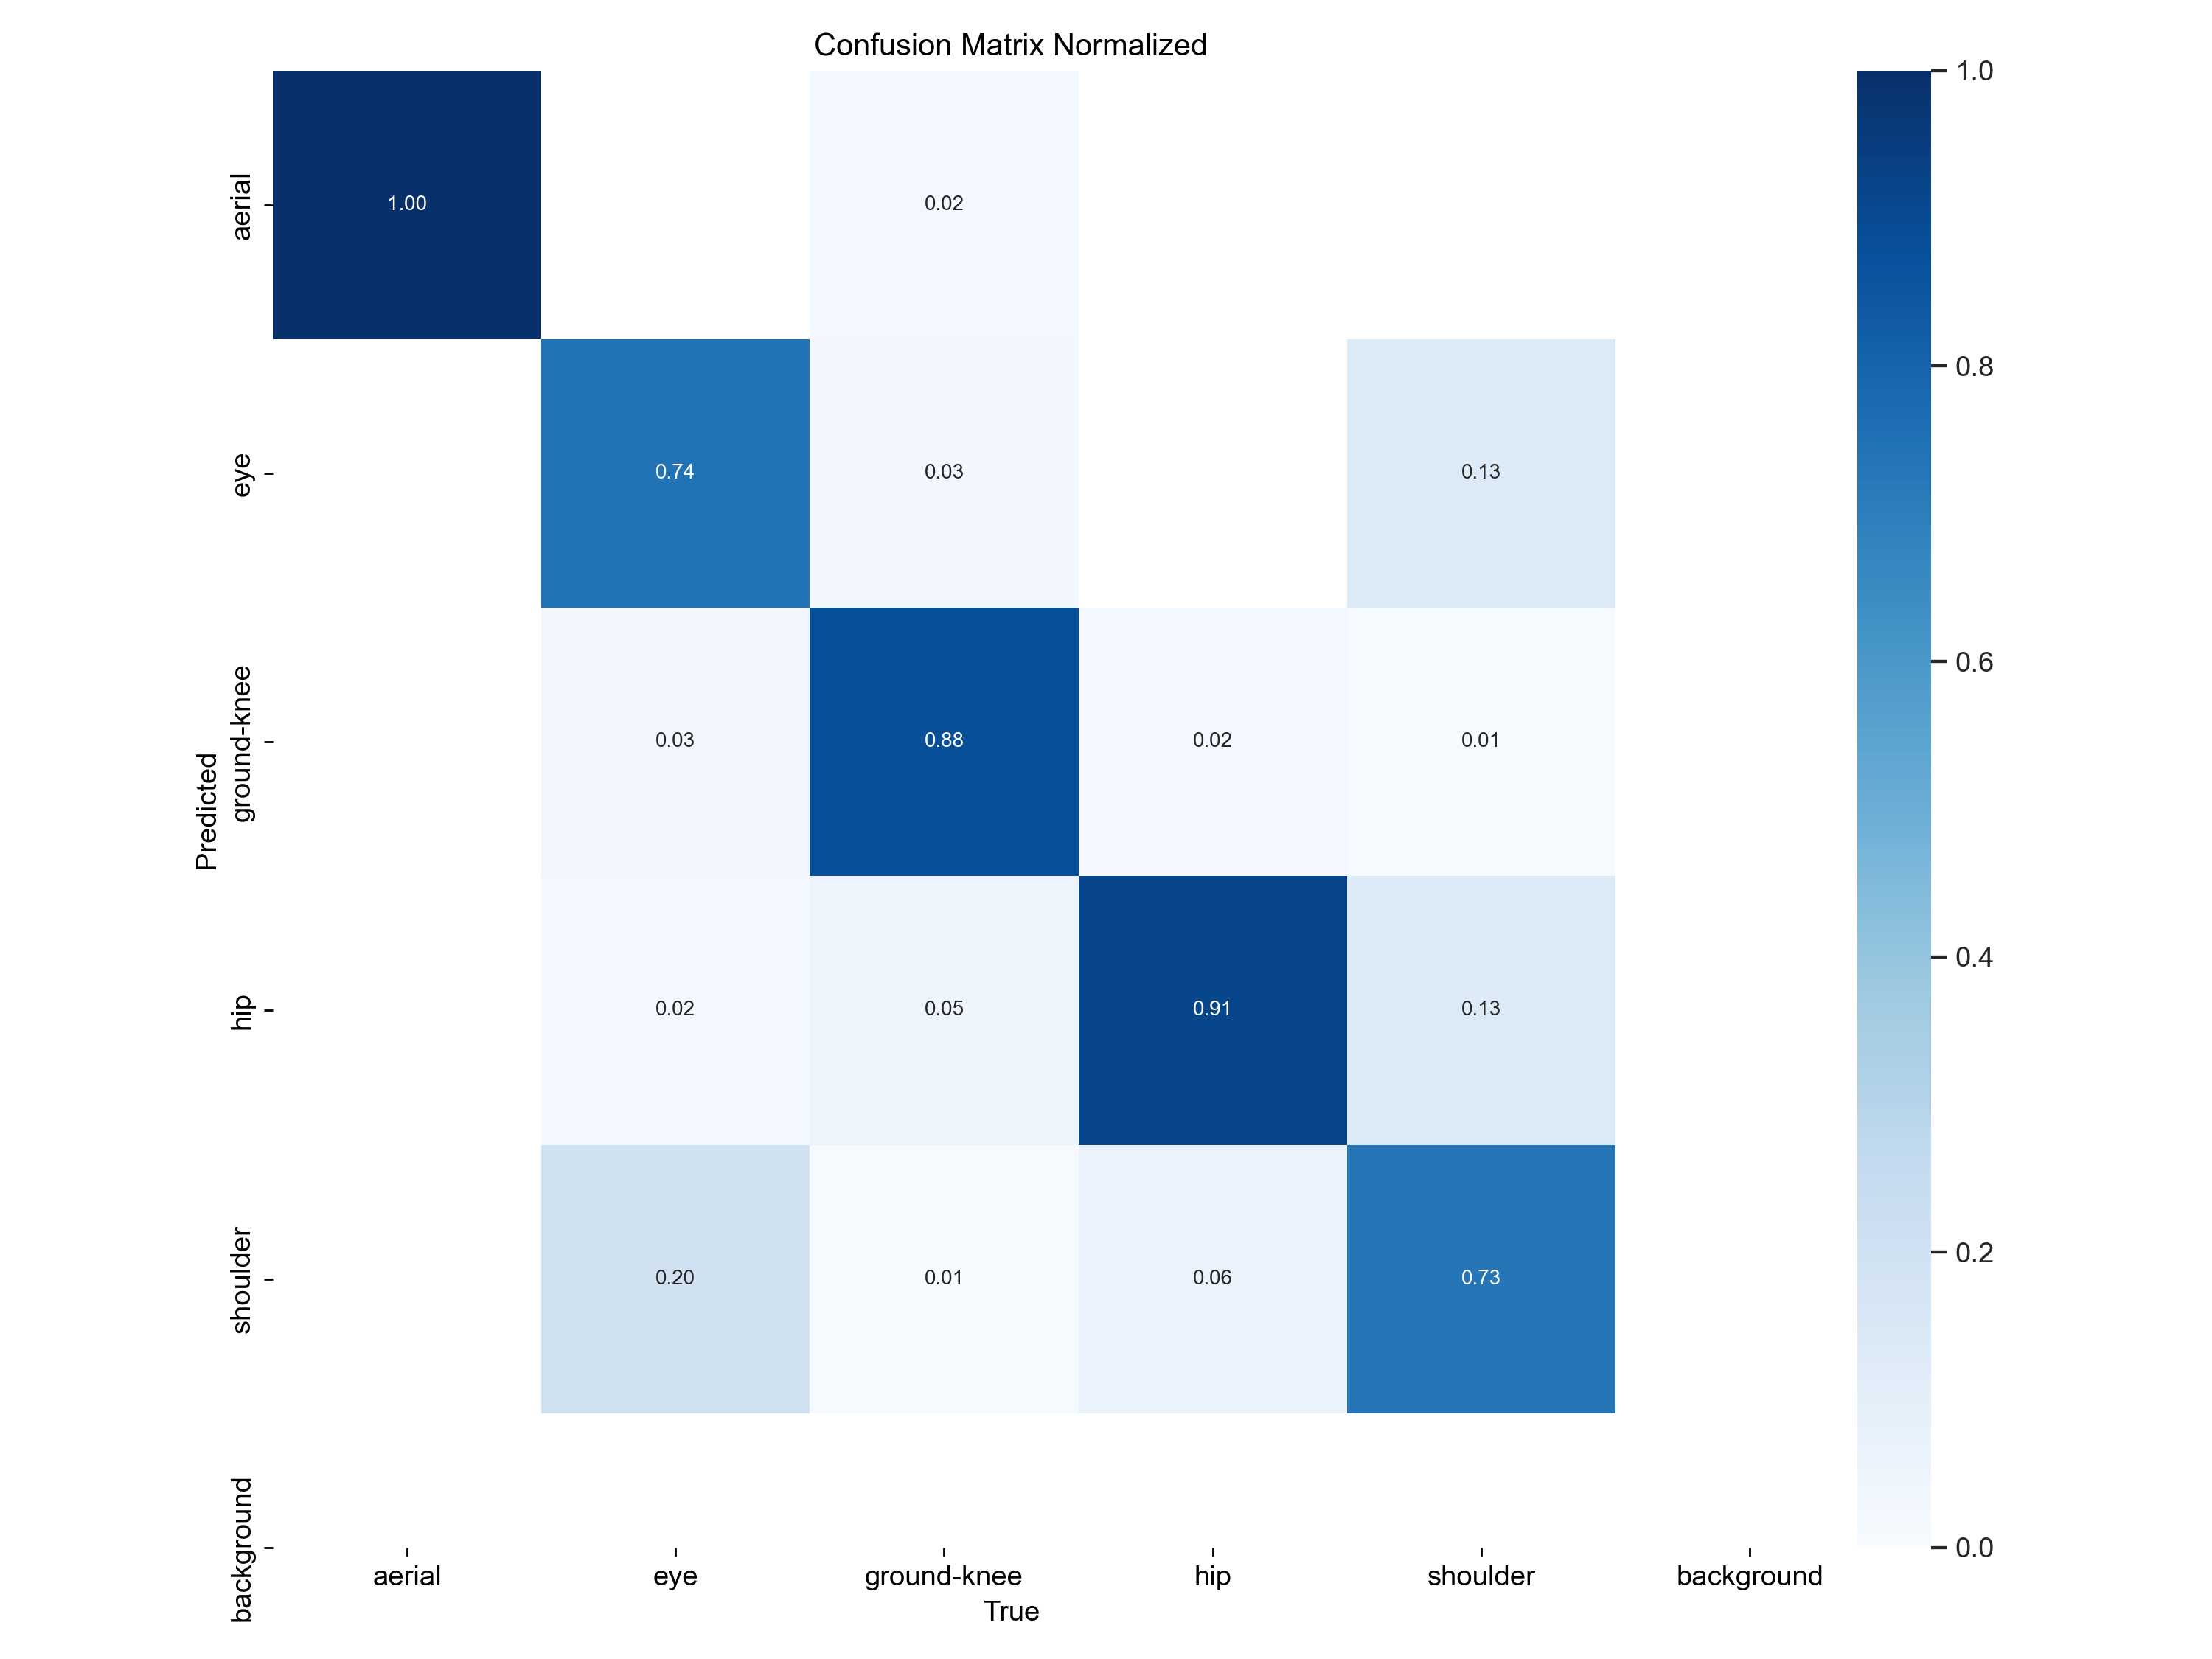

In [13]:
#Matrix for 75 epoch run 
%matplotlib inline
from PIL import Image

Image.open('C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/CVProject-ShotAngle_LevelClassifier/level-model-training/runs/classify/train44/confusion_matrix_normalized.png')

In [14]:
level_model.export(format='onnx')

Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)

PyTorch: starting from 'runs\classify\train4\weights\best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 5) (2.8 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.35...
ONNX: export success  0.5s, saved as 'runs\classify\train4\weights\best.onnx' (5.5 MB)

Export complete (0.5s)
Results saved to C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level-model-training\runs\classify\train4\weights
Predict:         yolo predict task=classify model=runs\classify\train4\weights\best.onnx imgsz=224  
Validate:        yolo val task=classify model=runs\classify\train4\weights\best.onnx imgsz=224 data=C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/CVProject-ShotAngle_LevelClassifier/level_data  
Visualize:       https://netron.app


'runs\\classify\\train4\\weights\\best.onnx'

In [15]:
# 120 epoch version 
level_model = YOLO('yolov8n-cls.pt')
level_model.to('cuda')
level_model.train(data=level_dir, epochs=120,patience=120)

100%|█████████████████████████████████████████████████████████████████████████████| 5.31M/5.31M [00:00<00:00, 5.84MB/s]

New https://pypi.org/project/ultralytics/8.3.27 available  Update with 'pip install -U ultralytics'
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/CVProject-ShotAngle_LevelClassifier/level_data, epochs=120, time=None, patience=120, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

val: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\val... found 467 images in 5 classes  
test: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\test... found 484 images in 5 classes  
Overriding model.yaml nc=1000 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64,

100%|█████████████████████████████████████████████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 7.68MB/s]


AMP: checks passed 


train: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_da

train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\train\eye\eye_8003.JPG: corrupt JPEG restored and saved
train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\train\hip\hip_8003.JPG: corrupt JPEG restored and saved
train: WARNING  C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\train\shoulder\shoulder_8003.JPG: corrupt JPEG restored and saved



val: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs\classify\train5
Starting training for 120 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/120     0.308G      1.279          3        224: 100%|██████████| 140/140 [00:05<00:00, 25.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 57.64it/s]

                   all      0.737          1



      Epoch    GPU_mem       loss  Instances       Size


      2/120     0.308G     0.7656          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 81.85it/s]

                   all      0.799          1



      Epoch    GPU_mem       loss  Instances       Size


      3/120     0.308G     0.6338          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 88.62it/s]

                   all      0.799          1



      Epoch    GPU_mem       loss  Instances       Size


      4/120     0.306G     0.5472          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.85it/s]


                   all      0.814          1

      Epoch    GPU_mem       loss  Instances       Size


      5/120     0.308G     0.5196          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 70.79it/s]

                   all      0.807          1



      Epoch    GPU_mem       loss  Instances       Size


      6/120     0.308G     0.4617          3        224: 100%|██████████| 140/140 [00:05<00:00, 27.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 71.79it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      7/120     0.308G     0.4113          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 86.62it/s]


                   all      0.822          1

      Epoch    GPU_mem       loss  Instances       Size


      8/120     0.308G     0.3752          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 78.17it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


      9/120     0.308G     0.3443          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 75.12it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     10/120     0.306G     0.3256          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 72.22it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     11/120     0.308G     0.3104          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 83.43it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     12/120     0.308G     0.2807          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 80.70it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     13/120     0.308G     0.2757          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 91.22it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     14/120     0.306G     0.2502          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 78.67it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


     15/120     0.306G     0.2652          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 83.45it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     16/120     0.308G     0.2544          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 79.20it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     17/120     0.308G     0.2085          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 54.38it/s]


                   all      0.829          1

      Epoch    GPU_mem       loss  Instances       Size


     18/120     0.308G     0.2363          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 72.76it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     19/120     0.308G     0.1955          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 89.11it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


     20/120     0.306G     0.2025          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.61it/s]


                   all      0.852          1

      Epoch    GPU_mem       loss  Instances       Size


     21/120     0.306G     0.1916          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 73.43it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


     22/120     0.306G     0.1965          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 88.37it/s]

                   all      0.852          1



      Epoch    GPU_mem       loss  Instances       Size


     23/120     0.308G     0.1922          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 79.78it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     24/120     0.308G     0.1827          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 75.27it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     25/120     0.306G     0.1876          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 79.14it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     26/120     0.306G     0.1756          3        224: 100%|██████████| 140/140 [00:04<00:00, 32.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 80.01it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


     27/120     0.308G       0.16          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 93.07it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     28/120     0.306G     0.1385          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 86.63it/s]


                   all      0.842          1

      Epoch    GPU_mem       loss  Instances       Size


     29/120     0.306G     0.1471          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 86.66it/s]

                   all      0.865          1



      Epoch    GPU_mem       loss  Instances       Size


     30/120     0.308G     0.1609          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 78.31it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     31/120     0.308G      0.139          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 81.52it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     32/120     0.308G     0.1423          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 78.17it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     33/120     0.308G     0.1455          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 84.04it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     34/120     0.308G     0.1492          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 78.12it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     35/120     0.308G     0.1311          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 75.13it/s]

                   all       0.85          1



      Epoch    GPU_mem       loss  Instances       Size


     36/120     0.308G      0.138          3        224: 100%|██████████| 140/140 [00:04<00:00, 32.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 74.37it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     37/120     0.306G     0.1525          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 78.67it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     38/120     0.308G     0.1221          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 84.97it/s]


                   all      0.844          1

      Epoch    GPU_mem       loss  Instances       Size


     39/120     0.308G     0.1358          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 74.75it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     40/120     0.306G     0.1162          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 79.18it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


     41/120     0.308G     0.1265          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 84.66it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     42/120     0.308G     0.1098          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 79.65it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     43/120     0.308G     0.1275          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 71.22it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     44/120     0.308G     0.1337          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 83.32it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     45/120     0.306G     0.1327          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 80.50it/s]


                   all      0.839          1

      Epoch    GPU_mem       loss  Instances       Size


     46/120     0.308G     0.1372          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 84.54it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     47/120     0.308G     0.1164          3        224: 100%|██████████| 140/140 [00:04<00:00, 32.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 90.12it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


     48/120     0.308G     0.1192          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 83.54it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     49/120     0.308G    0.09393          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.28it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


     50/120     0.308G     0.1141          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 96.77it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     51/120     0.308G     0.1057          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 75.28it/s]

                   all      0.844          1



      Epoch    GPU_mem       loss  Instances       Size


     52/120     0.308G     0.1021          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 73.74it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


     53/120     0.306G    0.09418          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 81.34it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     54/120     0.308G    0.08428          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 82.82it/s]

                   all      0.842          1



      Epoch    GPU_mem       loss  Instances       Size


     55/120     0.308G    0.08667          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 82.74it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     56/120     0.306G    0.09058          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.98it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


     57/120     0.308G    0.09666          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 84.69it/s]

                   all      0.846          1



      Epoch    GPU_mem       loss  Instances       Size


     58/120     0.308G     0.0841          3        224: 100%|██████████| 140/140 [00:04<00:00, 32.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 81.07it/s]

                   all      0.842          1



      Epoch    GPU_mem       loss  Instances       Size


     59/120     0.306G     0.0965          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 86.19it/s]

                   all      0.842          1



      Epoch    GPU_mem       loss  Instances       Size


     60/120     0.308G     0.0779          3        224: 100%|██████████| 140/140 [00:04<00:00, 32.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 79.38it/s]

                   all      0.842          1



      Epoch    GPU_mem       loss  Instances       Size


     61/120     0.308G    0.09428          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.79it/s]


                   all      0.831          1

      Epoch    GPU_mem       loss  Instances       Size


     62/120     0.308G     0.1019          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 72.67it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     63/120     0.308G    0.09843          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 79.47it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


     64/120     0.306G    0.08209          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 70.46it/s]

                   all       0.82          1



      Epoch    GPU_mem       loss  Instances       Size


     65/120     0.308G    0.07381          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 85.56it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     66/120     0.308G    0.06992          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 85.69it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


     67/120     0.308G    0.06327          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 73.70it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


     68/120     0.308G    0.07725          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 80.27it/s]


                   all      0.827          1

      Epoch    GPU_mem       loss  Instances       Size


     69/120     0.308G    0.08122          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 78.01it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     70/120     0.308G      0.078          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.32it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     71/120     0.306G    0.08891          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 78.59it/s]

                   all      0.822          1



      Epoch    GPU_mem       loss  Instances       Size


     72/120     0.308G    0.07399          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 88.66it/s]

                   all      0.816          1



      Epoch    GPU_mem       loss  Instances       Size


     73/120     0.306G    0.09772          3        224: 100%|██████████| 140/140 [00:05<00:00, 27.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 80.78it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     74/120     0.308G    0.07577          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 79.84it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     75/120     0.308G     0.1092          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 94.99it/s] 

                   all      0.842          1



      Epoch    GPU_mem       loss  Instances       Size


     76/120     0.308G    0.07543          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 71.07it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


     77/120     0.308G    0.06939          3        224: 100%|██████████| 140/140 [00:04<00:00, 32.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 74.39it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     78/120     0.306G    0.07004          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 63.75it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     79/120     0.308G    0.07128          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 72.85it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     80/120     0.306G    0.06724          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 76.91it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     81/120     0.306G    0.06274          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 90.79it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     82/120     0.306G    0.05857          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 85.64it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     83/120     0.308G     0.0661          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 82.35it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     84/120     0.308G     0.0711          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 84.83it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     85/120     0.306G    0.07609          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 81.26it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


     86/120     0.306G    0.06291          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 77.39it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     87/120     0.308G    0.05897          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 78.59it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     88/120     0.308G    0.06795          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 85.03it/s]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


     89/120     0.308G    0.04798          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 78.82it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     90/120     0.308G    0.05962          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 77.68it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     91/120     0.306G    0.05906          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 85.34it/s]


                   all      0.835          1

      Epoch    GPU_mem       loss  Instances       Size


     92/120     0.308G     0.0649          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.62it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


     93/120     0.306G    0.05897          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 81.08it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


     94/120     0.308G    0.05122          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 85.62it/s]

                   all      0.824          1



      Epoch    GPU_mem       loss  Instances       Size


     95/120     0.308G    0.04527          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.61it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


     96/120     0.308G    0.05963          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.74it/s]


                   all      0.839          1

      Epoch    GPU_mem       loss  Instances       Size


     97/120     0.308G    0.04892          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 73.82it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     98/120     0.306G    0.05235          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 75.38it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


     99/120     0.308G    0.06684          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.06it/s]


                   all      0.839          1

      Epoch    GPU_mem       loss  Instances       Size


    100/120     0.308G    0.05958          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 75.18it/s]

                   all      0.848          1



      Epoch    GPU_mem       loss  Instances       Size


    101/120     0.306G    0.05308          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 83.64it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


    102/120     0.308G    0.05269          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 77.53it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


    103/120     0.308G    0.04947          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.54it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


    104/120     0.308G    0.05331          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.22it/s]

                   all      0.842          1



      Epoch    GPU_mem       loss  Instances       Size


    105/120     0.306G    0.04844          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 85.93it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


    106/120     0.308G    0.05409          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 78.55it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


    107/120     0.308G    0.04801          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 84.67it/s]

                   all      0.852          1



      Epoch    GPU_mem       loss  Instances       Size


    108/120     0.308G    0.04435          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 80.33it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


    109/120     0.308G    0.05046          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 74.75it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


    110/120     0.308G    0.04963          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 72.04it/s]

                   all      0.842          1



      Epoch    GPU_mem       loss  Instances       Size


    111/120     0.308G    0.04971          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 82.09it/s]

                   all      0.842          1



      Epoch    GPU_mem       loss  Instances       Size


    112/120     0.306G     0.0468          3        224: 100%|██████████| 140/140 [00:04<00:00, 30.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 84.09it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


    113/120     0.308G    0.07761          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 73.16it/s]

                   all      0.835          1



      Epoch    GPU_mem       loss  Instances       Size


    114/120     0.308G    0.04345          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 70.85it/s]

                   all      0.837          1



      Epoch    GPU_mem       loss  Instances       Size


    115/120     0.306G    0.04975          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 75.05it/s]

                   all      0.831          1



      Epoch    GPU_mem       loss  Instances       Size


    116/120     0.308G    0.04974          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 87.36it/s]

                   all      0.829          1



      Epoch    GPU_mem       loss  Instances       Size


    117/120     0.308G    0.05003          3        224: 100%|██████████| 140/140 [00:05<00:00, 27.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 74.74it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


    118/120     0.306G    0.04101          3        224: 100%|██████████| 140/140 [00:04<00:00, 28.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 88.51it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


    119/120     0.306G    0.04959          3        224: 100%|██████████| 140/140 [00:04<00:00, 29.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 80.46it/s]

                   all      0.839          1



      Epoch    GPU_mem       loss  Instances       Size


    120/120     0.308G    0.04416          3        224: 100%|██████████| 140/140 [00:04<00:00, 31.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 82.60it/s]

                   all      0.844          1



120 epochs completed in 0.185 hours.
Optimizer stripped from runs\classify\train5\weights\last.pt, 3.0MB
Optimizer stripped from runs\classify\train5\weights\best.pt, 3.0MB

Validating runs\classify\train5\weights\best.pt...
Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\train... found 2227 images in 5 classes  
val: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\val... found 467 images in 5 classes  
test: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\test... found 484 images in 5 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 15/15 [00:00<00:00, 88.16it/s]


                   all      0.865          1
Speed: 0.1ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train5


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000252F141B2F0>
curves: []
curves_results: []
fitness: 0.9325481653213501
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8650963306427002, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9325481653213501}
save_dir: WindowsPath('runs/classify/train5')
speed: {'preprocess': 0.06409681838891236, 'inference': 0.24951040361882276, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.8650963306427002
top5: 1.0

In [16]:
metrics = level_model.val()

Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3080 Laptop GPU, 16384MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
train: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\train... found 2227 images in 5 classes  
val: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\val... found 484 images in 5 classes  
test: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\test... found 467 images in 5 classes  


val: Scanning C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data

val: New cache created: C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level_data\val.cache



               classes   top1_acc   top5_acc: 100%|██████████| 31/31 [00:01<00:00, 23.24it/s]


                   all      0.787          1
Speed: 0.2ms preprocess, 1.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train52


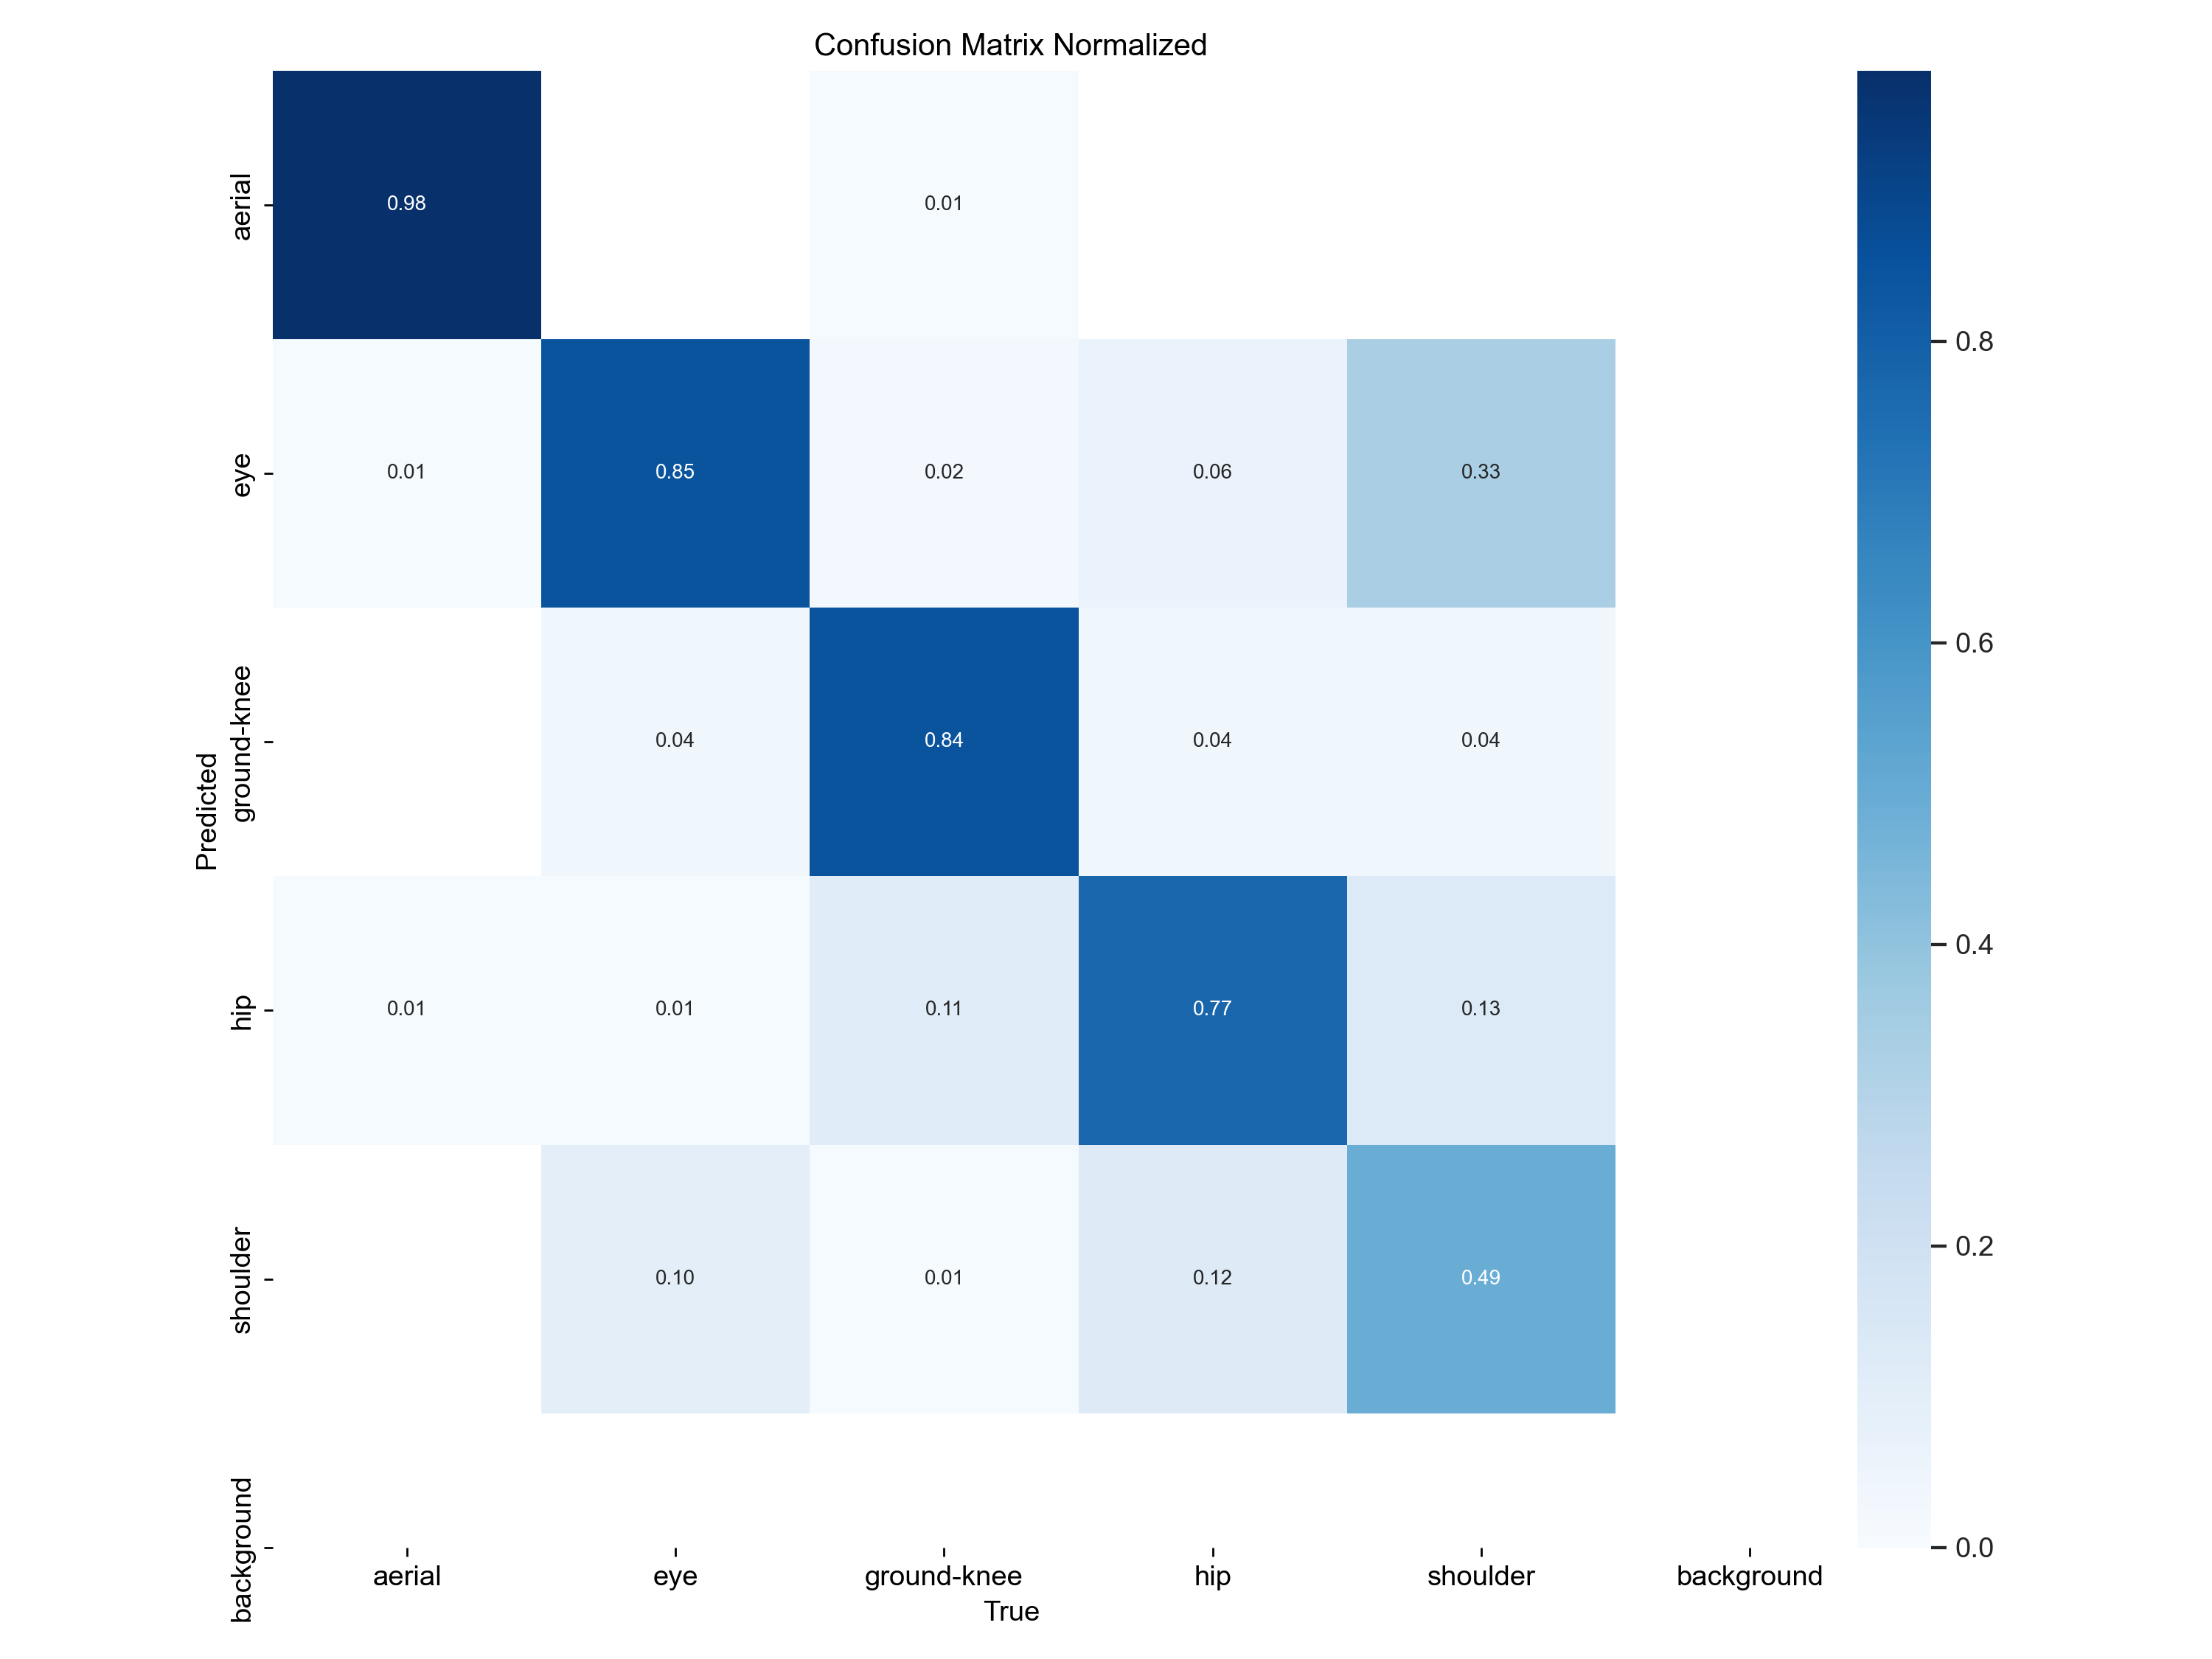

In [17]:
#Matrix for 120 epoch run 
%matplotlib inline
from PIL import Image

Image.open('C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/CVProject-ShotAngle_LevelClassifier/level-model-training/runs/classify/train52/confusion_matrix_normalized.png')

In [18]:
level_model.export(format='onnx')

Ultralytics 8.3.17  Python-3.12.6 torch-2.5.1+cu124 CPU (11th Gen Intel Core(TM) i7-11800H 2.30GHz)

PyTorch: starting from 'runs\classify\train5\weights\best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 5) (2.8 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.35...
ONNX: export success  0.3s, saved as 'runs\classify\train5\weights\best.onnx' (5.5 MB)

Export complete (0.4s)
Results saved to C:\Users\alex\Documents\SFU Courses\FALL 2024\IAT 360\Work\CVProject-ShotAngle_LevelClassifier\level-model-training\runs\classify\train5\weights
Predict:         yolo predict task=classify model=runs\classify\train5\weights\best.onnx imgsz=224  
Validate:        yolo val task=classify model=runs\classify\train5\weights\best.onnx imgsz=224 data=C:/Users/alex/Documents/SFU Courses/FALL 2024/IAT 360/Work/CVProject-ShotAngle_LevelClassifier/level_data  
Visualize:       https://netron.app


'runs\\classify\\train5\\weights\\best.onnx'